In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import contextily as cx
import datetime as dt
import json
import time
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from functions_file import *
print(testfunction(4))

16


### Outline
1. Import data and add basic information
    1. Import data
    1. Define area & Coarse filtering
    1. Add information
    1. Fine filtering
2. Clean data
2. Look at data
3. Look at diff. modes
6. Check distance and speed values

### 1. Import (cleaned, per polygon, without parking removed) data and add basic information

In [27]:
polygons = pd.read_csv('../data/polygons11.csv') #polygons11
#polygon_name = 'polygon_r0'
#POLYGON = get_polygon(polygon_name,polygons)
#file_name = '../output/data_clean/prepared_data_%s.pkl'%(polygon_name) #change again
file_type = 'pickle'
polygon_names = polygons.name.values[polygons.name.values != 'polygon_r4']

In [34]:
#Specify values:
speed_threshold = 1 #km/h
min_mean_speed = 15 #km/h
min_diff_between_timestamps = '3s' #has to be a string
min_duration_of_stops = 5 #seconds
vehicle_type_considered_for_stop = ['Bus','Taxi', 'Medium Vehicle', 'Heavy Vehicle']

<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
Vehicles stopping, when the mean speed of all vehicles was bigger than 20 km/h:  64
Duration of stops before filtering


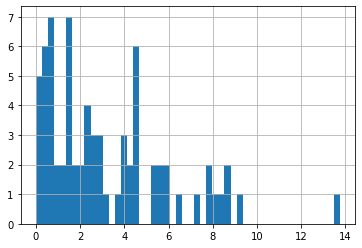

Number of stopped vehicles after filtering by min duration: 1
Duration of calculating stops:  0.10200095176696777
Duration for calculating lane changes (incl. assignment of lines):  34.5635883808136
Time for assigning lane changes to intervals:  0.5410654544830322
<class 'str'>
<class 'shapely.geometry.point.Point'>
Vehicles stopping, when the mean speed of all vehicles was bigger than 20 km/h:  275
Duration of stops before filtering


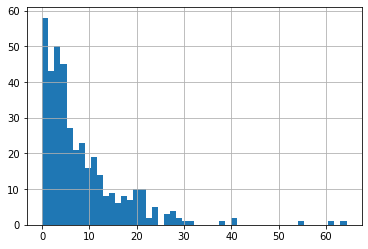

Number of stopped vehicles after filtering by min duration: 116
Duration of calculating stops:  11.988312005996704
Duration for calculating lane changes (incl. assignment of lines):  44.004979610443115
Time for assigning lane changes to intervals:  1.3281199932098389
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
Vehicles stopping, when the mean speed of all vehicles was bigger than 20 km/h:  67
Duration of stops before filtering


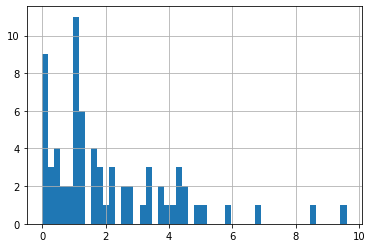

Number of stopped vehicles after filtering by min duration: 0
Duration for calculating lane changes (incl. assignment of lines):  24.94070315361023
Time for assigning lane changes to intervals:  1.456099033355713
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
Vehicles stopping, when the mean speed of all vehicles was bigger than 20 km/h:  77
Duration of stops before filtering


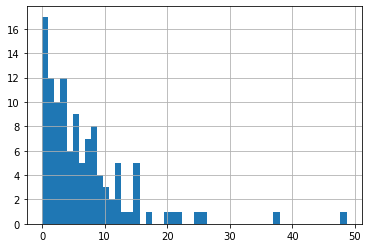

Number of stopped vehicles after filtering by min duration: 23
Duration of calculating stops:  2.5674784183502197
Duration for calculating lane changes (incl. assignment of lines):  25.25241446495056
Time for assigning lane changes to intervals:  0.8352921009063721
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
Vehicles stopping, when the mean speed of all vehicles was bigger than 20 km/h:  91
Duration of stops before filtering


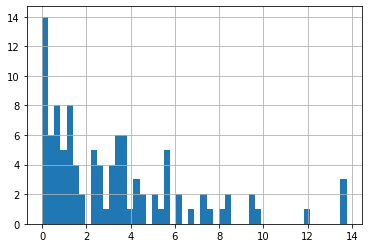

Number of stopped vehicles after filtering by min duration: 4
Duration of calculating stops:  0.4120926856994629
Duration for calculating lane changes (incl. assignment of lines):  30.39021897315979
Time for assigning lane changes to intervals:  0.9324753284454346
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
Vehicles stopping, when the mean speed of all vehicles was bigger than 20 km/h:  145
Duration of stops before filtering


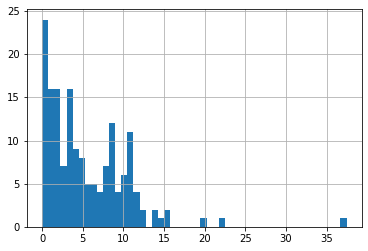

Number of stopped vehicles after filtering by min duration: 28
Duration of calculating stops:  2.934951066970825
Duration for calculating lane changes (incl. assignment of lines):  44.014814138412476
Time for assigning lane changes to intervals:  0.8570027351379395
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
Vehicles stopping, when the mean speed of all vehicles was bigger than 20 km/h:  69
Duration of stops before filtering


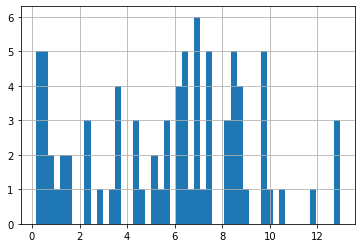

Number of stopped vehicles after filtering by min duration: 5
Duration of calculating stops:  0.48210835456848145
Duration for calculating lane changes (incl. assignment of lines):  11.897252559661865
Time for assigning lane changes to intervals:  0.7247598171234131
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
Vehicles stopping, when the mean speed of all vehicles was bigger than 20 km/h:  36
Duration of stops before filtering


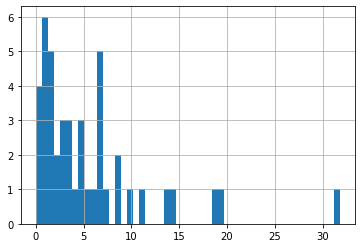

Number of stopped vehicles after filtering by min duration: 6
Duration of calculating stops:  0.6086893081665039
Duration for calculating lane changes (incl. assignment of lines):  22.598585605621338
Time for assigning lane changes to intervals:  1.1465914249420166
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
Vehicles stopping, when the mean speed of all vehicles was bigger than 20 km/h:  118
Duration of stops before filtering


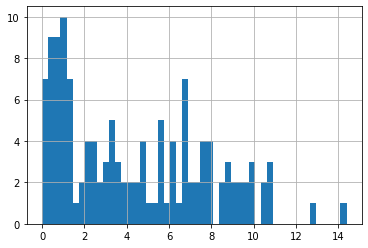

Number of stopped vehicles after filtering by min duration: 10
Duration of calculating stops:  1.00907301902771
Duration for calculating lane changes (incl. assignment of lines):  22.77340269088745
Time for assigning lane changes to intervals:  0.3710010051727295
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
Vehicles stopping, when the mean speed of all vehicles was bigger than 20 km/h:  157
Duration of stops before filtering


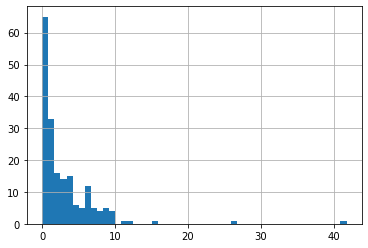

Number of stopped vehicles after filtering by min duration: 5
Duration of calculating stops:  0.5496976375579834
Duration for calculating lane changes (incl. assignment of lines):  29.39641308784485
Time for assigning lane changes to intervals:  0.6514649391174316
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
Vehicles stopping, when the mean speed of all vehicles was bigger than 20 km/h:  360
Duration of stops before filtering


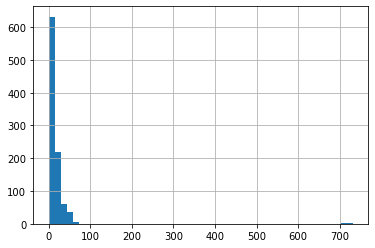

Number of stopped vehicles after filtering by min duration: 490
Duration of calculating stops:  56.77354145050049
Duration for calculating lane changes (incl. assignment of lines):  82.59005093574524
Time for assigning lane changes to intervals:  1.7853798866271973


In [30]:
#########################################
#run over all polygons
for polygon_name in polygon_names:
    file_name = '../output/data_clean/prepared_data_%s.pkl'%(polygon_name)
    waypoints_w_dist_mode = import_clean_data(file_name,file_type,polygon_name)
    #assure that geometry is of type point
    print(type(waypoints_w_dist_mode.iloc[0]['geometry']))
    if type(waypoints_w_dist_mode.iloc[0]['geometry'])==str:
        waypoints_w_dist_mode['geometry'] = waypoints_w_dist_mode['geometry'].apply(lambda x: Point([float(i) for i in x[7:-1].split()]))
        waypoints_w_dist_mode = gpd.GeoDataFrame(waypoints_w_dist_mode, geometry=waypoints_w_dist_mode.geometry, crs="EPSG:4326")
    print(type(waypoints_w_dist_mode.iloc[0]['geometry']))
    #filter for speed < speed_threshold
    data = waypoints_w_dist_mode[(waypoints_w_dist_mode.speed<speed_threshold)]
    
    #calculate mean speed for each timestep, merge the mean speed to each datapoint
    mspd = pd.DataFrame(waypoints_w_dist_mode[waypoints_w_dist_mode['type'].isin(['Car'])]
                        .groupby('timestamp')['speed'].mean()).reset_index().rename(columns={'speed':'mean_speed'})
    data = data.join(mspd.set_index('timestamp'), on=data['timestamp'])
    #filter for vehicle types
    spvec_stops = data[(data['type'].isin(vehicle_type_considered_for_stop))]
    #print('Mean speed of vehicles in stopping intervals before filtering')
    #plt.show(spvec_stops.mean_speed.hist(bins=25))
    #filter for timesteps, where the mean speed > min_mean_speed
    spvec_stops = spvec_stops[spvec_stops.mean_speed>min_mean_speed]
    #print('Mean speed of vehicles in stopping intervals after filtering')
    #plt.show(spvec_stops.mean_speed.hist(bins=25))
    print('Vehicles stopping, when the mean speed of all vehicles was bigger than %s km/h: '%min_mean_speed, str(len(spvec_stops.unique_id.unique())))

    # Calculate speed differences for every time step, calculate timestamp difference for all ids beneath the threshold
    # Where the time diff is bigger than 'min_diff_between_timestamps' second, a new stop id is appended

    spvec_stops['speed_diff'] = spvec_stops.groupby('unique_id')['speed'].diff()
    spvec_stops['time_diff'] = spvec_stops.groupby('unique_id')['timestamp'].diff()
    spvec_stops['td_val'] = spvec_stops['time_diff'] > min_diff_between_timestamps # min difference in consecutive timestamps to be counted as new stop
    unique_stop_id = 0
    stop_ids = []
    for i,row in spvec_stops.iterrows():
        if pd.isnull(row['time_diff']) or row['td_val']:
            unique_stop_id += 1
        stop_ids.append(unique_stop_id)
    spvec_stops['stop_id'] = stop_ids

    #calculate duration of stops, filter for minimum 'min duration of stop' second-stops
    aggr = spvec_stops.groupby('stop_id').max('timestamp')
    aggr['max_t'] = spvec_stops.groupby('stop_id')['timestamp'].max()
    aggr['min_t'] = spvec_stops.groupby('stop_id')['timestamp'].min()
    aggr['span_per_stop'] = (aggr['max_t']-aggr['min_t'])/np.timedelta64(1, 's')
    aggr['type'] = spvec_stops.groupby('stop_id')['type'].apply(lambda x: list(np.unique(x))[0])
    print('Duration of stops before filtering')
    plt.show(aggr['span_per_stop'].hist(bins=50))
    aggr = aggr[aggr.span_per_stop>min_duration_of_stops]     #min duration of stop
    print('Number of stopped vehicles after filtering by min duration: %s'%len(aggr))
    aggr.sort_values(by='span_per_stop', ascending=False).head(5)
    #plot the location of the stops on a map (in a shapefile)
    #aggr_geometry = spvec_stops[spvec_stops.stop_id.isin(aggr.index)].groupby('stop_id')['geometry'].first()
    #print(aggr_geometry)
    #aggr_geometry.to_file('../output/shapefiles/dur_%ss_meanCar_%skmh_%s.shp'%(min_duration_of_stops, min_mean_speed, polygon_name), driver='ESRI Shapefile')
    
    # load q,k,v data per interval (30 secs on rolling 3 minutes)
    # add scaled up flows and densities
    intervals_MS = pd.read_pickle('../output/data_processed/processed_data_all_bypolygon_speed_diff.pkl')
    scalefactorsfile = '../output/data_processed/scalefactors_bypolygon.pkl' # 'scalefactors_bypolygon_bymode.pkl'    
    # to read
    with open(scalefactorsfile, 'rb') as f:
        scalefactors = pickle.load(f)
    # scale values back up
    cs = ['q_all_MS','k_all_MS','q_all_LD','k_all_LD']
    for c in ['q_all_MS','k_all_MS','q_all_LD','k_all_LD']:
        scaledup = scaleup(intervals_MS[c],intervals_MS['polygon'],scalefactors,c)
        intervals_MS['%s_s'%c] = scaledup
        cs.append('%s_s'%c)
    intervals_MS['v2'] = intervals_MS.q_all_LD_s / intervals_MS.k_all_LD_s
    #add the stops to the intervals
    start = time.time()
    intervals_MS = intervals_MS[intervals_MS.polygon == polygon_name]
    intervals_MS['stop_count'] = np.zeros(len(intervals_MS))
    if len(aggr)>0:
        intervals_MS['stop_type'] = ['']*len(intervals_MS)
        intervals_MS['stop_length'] = ['']*len(intervals_MS)
        stop_types = []
        # add all columns that match the stop, vehicles type and duration to the intervals
        for i,row in aggr.iterrows():
            t_start_higher_tmin = row['min_t'] < (intervals_MS.times-pd.Timedelta('150s')) #1
            t_start_lower_tmax = row['max_t'] > (intervals_MS.times - pd.Timedelta('150s')) #2
            t_start_lower_tmin = row['min_t'] > (intervals_MS.times-pd.Timedelta('150s')) #3
            t_end_higher_tmin = row['min_t'] < (intervals_MS.times+pd.Timedelta('30s')) #4
            #1+2 oder 3+4
            true = (t_start_higher_tmin & t_start_lower_tmax) | (t_start_lower_tmin & t_end_higher_tmin)
            # additionally add the vehicle type of that stop and the duration
            intervals_MS.stop_count += true
            intervals_MS['new_type'] = np.where(true, row.type, '')
            intervals_MS.stop_type= intervals_MS[['stop_type','new_type']].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
            intervals_MS['new_length'] = np.where(true, row.span_per_stop, '')
            intervals_MS.stop_length= intervals_MS[['new_length','stop_length']].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
        intervals_MS['veh_stop_types'] = intervals_MS.stop_type.str.split(',').apply(lambda x: list(filter(lambda num: num != '', x)))
        intervals_MS['veh_stop_lengths'] = intervals_MS.stop_length.str.split(',').apply(lambda x: list(filter(lambda num: num != '', x)))
        intervals_MS.veh_stop_lengths = intervals_MS.veh_stop_lengths.apply(lambda x: list(map(float,x)))
        intervals_MS = intervals_MS.drop(['stop_type','new_type','stop_length','new_length'], axis=1)
        print('Duration of calculating stops: ', (time.time()-start))
    else:
        intervals_MS['veh_stop_types'] = ['']*len(intervals_MS)
        intervals_MS['veh_stop_lengths'] = ['']*len(intervals_MS)

    #idea: check when the vehicles cross the middle line (dashed line)
    #lanes-file: header are OL(oben links),OR,UR(unten rechts) and UL; every line contains the 4 points, 
    #x,y seperated by ,; points separated by a ;
    #one line for every lane, starting from the right most lane in driving direction with id=0
    t = time.time()
    lanes_coords = pd.read_csv('../data/%s_Lanes.csv'%polygon_name,sep=';')
    lanes_df = pd.DataFrame(columns = ['lane_coords'])
    for id_,lane in lanes_coords.iterrows():
        lanes_df.loc[id_] = Polygon([[float(lane.OL.split(',')[1]),float(lane.OL.split(',')[0])],
                                 [float(lane.OR.split(',')[1]),float(lane.OR.split(',')[0])],
                                 [float(lane.UR.split(',')[1]),float(lane.UR.split(',')[0])],
                                 [float(lane.UL.split(',')[1]),float(lane.UL.split(',')[0])]])
    #data_per_lane =  []
    waypoints_w_dist_mode['lane_id'] = [-1]*len(waypoints_w_dist_mode)
    for id_,lane_polygon in lanes_df.iterrows():
        waypoints_w_dist_mode['lane_id'] = np.where(waypoints_w_dist_mode.geometry.within(lane_polygon['lane_coords']),
                                                    id_,waypoints_w_dist_mode['lane_id'])
    print('Duration for calculating lane changes (incl. assignment of lines): ',time.time()-t)
    waypoints_w_dist_mode = waypoints_w_dist_mode[waypoints_w_dist_mode.lane_id>-1]
    waypoints_w_dist_mode['lane_id_diff'] = waypoints_w_dist_mode.groupby('unique_id')['lane_id'].diff()
    waypoints_w_dist_mode['lane_change'] = ((waypoints_w_dist_mode['lane_id_diff'] != 0) & (~(pd.isnull(waypoints_w_dist_mode['lane_id_diff']))))
    #Set lane changes per vehicle and interval
    # keep for every vehicle the first timestamp where the lane change took place
    l_c = waypoints_w_dist_mode[waypoints_w_dist_mode.lane_change]
    l_c = l_c[l_c['type']!='Motorcycle'].groupby('unique_id').first()
    #add the stops to the intervals
    start = time.time()
    intervals_MS['lane_changes'] = np.zeros(len(intervals_MS))
    # add all columns that matches the stop, vehicles type and duration to the intervals
    for i,row in l_c.iterrows():
        t_start_lower_timestamp = row['timestamp'] > (intervals_MS.times-pd.Timedelta('150s')) #1
        t_end_higher_timestamp = row['timestamp'] < (intervals_MS.times+pd.Timedelta('30s')) #2
        #1+2
        true = (t_start_lower_timestamp & t_end_higher_timestamp)
        # additionally add the vehicle type of that stop and the duration
        intervals_MS.lane_changes += true
    print('Time for assigning lane changes to intervals: ', (time.time()-start))
    intervals_MS.to_pickle('../output/data_processed_events_%skmh_%ssec/processed_data_%s.pkl'%(min_mean_speed,min_duration_of_stops,polygon_name))

# Load and Merge Data together

In [35]:
all_MS = pd.concat( [pd.read_pickle('../output/data_processed_events_%skmh_%ssec/processed_data_%s.pkl'%(min_mean_speed,min_duration_of_stops,p)) 
                     for p in polygon_names] )

In [112]:
all_MS['stops_per_lanexlength'] = all_MS.stop_count / (all_MS.length)
all_MS['lanechanges_per_lanexlength'] = all_MS.lane_changes / (all_MS.length*all_MS.lanes)

In [32]:
all_MS[[ 'v_all_MS', 'k_all_MS', 'q_all_MS','v_Car_MS','k_Car_MS', 'q_Car_MS',
        'density_induced','stop_count', 'lane_changes']].corr() #'stops_per_lanexlength','lanechanges_per_lanexlength'

,v_all_MS,k_all_MS,q_all_MS,v_Car_MS,k_Car_MS,q_Car_MS,density_induced,stop_count,lane_changes
v_all_MS,1.000000,-0.488562,0.165422,0.956161,-0.568421,-0.054016,-0.255053,0.040659,0.128975
k_all_MS,-0.488562,1.000000,0.144377,-0.505442,0.867342,-0.038379,0.567545,0.045593,0.081812
q_all_MS,0.165422,0.144377,1.000000,0.149387,-0.071613,0.550043,-0.043593,0.118396,0.225570
v_Car_MS,0.956161,-0.505442,0.149387,1.000000,-0.602643,-0.007245,-0.237973,0.147421,0.157989
k_Car_MS,-0.568421,0.867342,-0.071613,-0.602643,1.000000,0.142154,0.454541,-0.142763,-0.098309
q_Car_MS,-0.054016,-0.038379,0.550043,-0.007245,0.142154,1.000000,-0.156007,-0.040547,-0.042708
density_induced,-0.255053,0.567545,-0.043593,-0.237973,0.454541,-0.156007,1.000000,0.285787,0.150990
stop_count,0.040659,0.045593,0.118396,0.147421,-0.142763,-0.040547,0.285787,1.000000,0.427479
lane_changes,0.128975,0.081812,0.225570,0.157989,-0.098309,-0.042708,0.150990,0.427479,1.000000


In [106]:
all_MS.columns

Index(['exp_id', 'polygon', 'DOW', 'times', 'v_Taxi_MS', 'k_Taxi_MS',
       'q_Taxi_MS', 'v_Car0050_MS', 'k_Car0050_MS', 'q_Car0050_MS', 'v_Car_MS',
       'k_Car_MS', 'q_Car_MS', 'v_Heavy Vehicle_MS', 'k_Heavy Vehicle_MS',
       'q_Heavy Vehicle_MS', 'v_all_MS', 'k_all_MS', 'q_all_MS',
       'v_Medium Vehicle_MS', 'k_Medium Vehicle_MS', 'q_Medium Vehicle_MS',
       'v_Bus_MS', 'k_Bus_MS', 'q_Bus_MS', 'v_Motorcycle_MS',
       'k_Motorcycle_MS', 'q_Motorcycle_MS', 'lanes', 'direction', 'busstops',
       'seplane', 'length', 'complexity', 'road_rank', 'v_all_LD', 'k_all_LD',
       'q_all_LD', 'diff_1_all_MS', 'diff_2_all_MS', 'diff_3_all_MS',
       'threshold', 'diff_to_threshold_quantile', 'density_induced',
       'q_all_MS_s', 'k_all_MS_s', 'q_all_LD_s', 'k_all_LD_s', 'v2',
       'stop_count', 'veh_stop_types', 'veh_stop_lengths', 'lane_changes'],
      dtype='object')

In [36]:
all_MS.to_pickle('../output/data_processed_events_%skmh_%ssec/processed_data_all_bypolygon.pkl'%(min_mean_speed,min_duration_of_stops))

# Visualization at the end

In [ ]:
#real world data (9 € Studie, TomTom) -> Trainieren auf GPS-Daten + Schleifen
# Übertragung in den Outlook -> Schleifen und Trajektorien
#Fahrzeuge die im Intervall lane change durchgeführt haben -- check
#events(stops) und lane change: abhängige Variablen
#-> netz trainieren mit bus, taxi, LDD, 5% Cars --> q, k (=regular) lane change, events (=enriched)
# mit drei szenarien durch spielen
#Argument NN: kolinearität

In [ ]:
#sum_duration of stops instead of number 

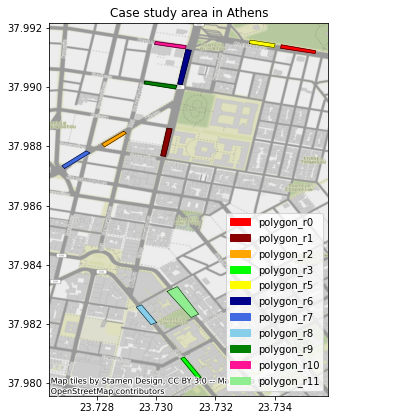

In [16]:
##################
# Plot all polygons with a contextily background map
##################
ax = waypoints_w_dist_mode.iloc[:100,:].plot(figsize=(5, 10), marker='o', color='gray', markersize=1,alpha=0.0)
colors = ['red','darkred','orange','lime','peru','yellow','darkblue',
          'royalblue','skyblue','green','deeppink','lightgreen','thistle','black']
polygons = pd.read_csv('../data/polygons11.csv')
for i,row in polygons.iterrows():
    if (row['name']=='polygon_r4'):# or (row['name']=='polygon_r11'):
        continue
    #i = min(i,10)
    p = get_polygon(row['name'],polygons)
    plt.fill(*p['coords'].exterior.xy,color=colors[i],label='%s'%row['name'])
    plt.plot(*p['coords'].exterior.xy,color='black',linewidth=0.5)

# current polygon
plt.legend(loc='lower right')
#cx.add_basemap(ax, crs=waypoints_w_dist_mode.crs, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs = waypoints_w_dist_mode.crs)
plt.title('Case study area in Athens')
#plt.savefig('LinksMap.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()

In [17]:
'''
Vorgehen:
1. Filtere alle Bus - Medium - Heavy - Taxi Halte heraus
    Lösung: kleiner 1 kmh
2. Matche dort jedem Timestep die entsprechende 5 - Sek - Intervall - Geschwindigkeiten von v_all_MS zu
    Lösung: alle aussortiert, bei denen die mean speed der anderen Fahrzeuge (Car, Motorcycle) unter 10 liegt
3. Sortiere alle weg, bei denen v_all unter einer Schwelle liegt
    Lösung: Schwelle von 10 kmh, bei allem drunter würde es sowieso keinen impact haben
4. Gucke die Haltedauern an
5. Matche die Haltedauern auf die 30 Sekunden-Intervalle
6. Betrachte jeweils die v_all_MS vor, während und nach //v_all_but_bus
'''
print(waypoints_w_dist_mode['type'].unique())
waypoints_w_dist_mode.head(3)

['Car' 'Taxi' 'Medium Vehicle' 'Motorcycle' 'Bus' 'Heavy Vehicle']


,unique_id,type,exp_id,DOW,ST,ET,DOY,track_id,time,speed,trv_dist,timestamp,geometry
19593,1000816,Car,1,Wed,8.5,9.0,2018-10-24,816,154.32,30.9673,172.780588,2018-10-24 08:32:34.320,POINT (23.73113 37.99124)
19594,1000816,Car,1,Wed,8.5,9.0,2018-10-24,816,154.48,31.3088,173.358935,2018-10-24 08:32:34.480,POINT (23.73113 37.99122)
19595,1000816,Car,1,Wed,8.5,9.0,2018-10-24,816,154.64,31.6702,173.946268,2018-10-24 08:32:34.640,POINT (23.73113 37.99121)


In [57]:
# lane changes per vehicle id -> leave out motorcycles since they drive only little maintaining of track
changes_per_veh_id = waypoints_w_dist_mode[waypoints_w_dist_mode['type']!='Motorcycle'].groupby('unique_id')['lane_change'].sum()
changes_per_veh_id.value_counts()

0     4012
1      796
2       92
3       82
4       16
5       11
7       10
6        5
8        4
9        2
14       1
10       1
13       1
Name: lane_change, dtype: int64

In [ ]:
'''

filename_lc = '../output/shapefiles/r6_no_lanechanges.shp'
make_shape_from_line_trajectories(many_changes,filename_lc)

filename_lc = '../output/shapefiles/r6_no_lanechanges.shp'
make_shape_from_line_trajectories(many_changes,filename_lc)
for i in range(0,3):
    waypoints_w_dist_mode[waypoints_w_dist_mode.lane_id==i]drop(['DOW','track_id','timestamp'],axis=1).to_file(filename_lc, driver='ESRI Shapefile')
#check for better lane identification: distance from road side --> nothing found there
cs = [(0,0), (37.991253,23.731158), (37.990029,23.730857), (0,0)]
distances = get_distance_from_segment_start(waypoints_w_dist_mode,cs)
distances_wo_mot = get_distance_from_segment_start(waypoints_w_dist_mode[waypoints_w_dist_mode['type']!='Motorcycle'],cs)
'''

In [165]:
'''
#some things for visualization:
intervals_MS.stop_count.value_counts()
#dummy variablen, transformation, 
intervals_MS.stop_count.hist()
clf = linear_model.LinearRegression()
reg = LinearRegression().fit(intervals_MS[['stop_count']], intervals_MS['v_all_MS'])
print(reg.score(intervals_MS[['stop_count']], intervals_MS['v_all_MS']))
print(reg.coef_)
print(reg.intercept_)
'''

0.0    156
1.0    121
2.0     61
3.0     28
4.0     21
5.0     14
6.0      8
8.0      3
7.0      2
Name: stop_count, dtype: int64